# `Cosine Similarity & Data Mining:`

# <font color=red>Mr Fugu Data Science</font>

# (◕‿◕✿)

**`Help Support the channel: Buy Me A Coffee @mrfugudatasci`**


In [1]:
import pandas as pd
import re,os
import numpy as np

# dictionary where values are list
from collections import defaultdict

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# `Cosine Similarity:`

<font size=5>$\cos \theta = \frac{\vec a  \, \cdot \, \vec b}{||\vec a|| \, \cdot \, ||\vec b||}$</font>

measures the similarity of two vectors using the inner product. Commonly used with document comparisons for text mining. 
+ The angle measured between the two vectors tells you if they are in the same direction or not.
    + The higher the values of $\theta$, the lower the $cos (\theta)$ and therefore the lower the similarity.
    + Each vector can represent a document
     
Let's see what this becomes for simplicity:

<font size=4>$\cos \theta = \frac{\sum\limits_{i=1}^{n}a_ib_i}{\sqrt(\sum\limits_{i=1}^{n}a_i^2) \sqrt(\sum\limits_{i=1}^{n}b_i^2)}$</font>

# `Ex. 1)`

**`Assume we have two vectors already set up by word frequencies as arrays and want to find similarity`**

In [2]:
A=np.array([1,5,3,4,2,0,0,1])

B=np.array([0,0,1,3,5,6,0,2])

numerator=np.dot(A,B)

denom=np.sqrt(sum(np.square(A)))*np.sqrt(sum(np.square(B)))

# Similarity:
round(numerator/denom,3)


0.417

In [3]:
# Find a file outside your directory:

def os_any_dir_search(file):
    u=[]
    for p,n,f in os.walk(os.getcwd()):
        
        for a in f:
            a = str(a)
            if a.endswith(file): # can be (.csv) or a file like I did and search 
#                 print(a)
#                 print(p)
                t=pd.read_json(p+'/'+file)
                u.append(p+'/'+a)
    return t,u

# pd.read_csv('tweets02.csv').head()


os_any_dir_search('tweets04.json')[1]

['/Users/zatoichi59/Desktop/youtube_vid_code/nested_tweets04.json',
 '/Users/zatoichi59/Desktop/youtube_vid_code/tweets04.json']

In [4]:
tweets_=pd.read_json(os_any_dir_search('tweets04.json')[1][1])
tweets_.head()

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,retweeted_status,quoted_status_id,quoted_status_id_str,possibly_sensitive,extended_entities,quoted_status
0,2020-07-13 01:29:34+00:00,1282487300362956800,1282487300362956800,Gonna be wild to watch all the people engaging...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-07-13 01:29:17+00:00,1282487227746938881,1282487227746938880,RT @lamphieryeg: Indigenous rights. LGBTQ. Rac...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'fr', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,fr,{'created_at': 'Mon Jul 13 01:20:23 +0000 2020...,1.282484e+18,1.282484e+18,NaN,NaN,NaN
2,2020-07-13 01:29:05+00:00,1282487179814543360,1282487179814543360,As global economies are faced with the effects...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",NaN,NaN,...,0,False,False,en,NaN,NaN,NaN,0.0,NaN,NaN
3,2020-07-13 01:29:03+00:00,1282487169215541249,1282487169215541248,@tcoreagain @john_kilford @RobRobbEdwards the ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.282430e+18,1.282430e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-07-13 01:29:02+00:00,1282487164392165376,1282487164392165376,RT @NickKristof: As we scrutinize history and ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,0,False,False,en,{'created_at': 'Sat Jul 11 18:55:25 +0000 2020...,NaN,NaN,NaN,NaN,NaN


In [5]:
# Showing what we will need to deal with: we need to remove these if exists
webpages=[]
for i in range(len(tweets_['text'])):
    webpages.append(re.findall(r'https?://\S+',tweets_['text'][i]))
webpages[:5]

[['https://t.co/AKsmcOewuq'],
 [],
 ['https://t.co/o0C49CEqQt'],
 ['https://t.co/TZNZ5NrgHy'],
 []]

In [6]:
# remove webpages/links and replace with empty space:

parse_tweets=[]

for i in range(len(tweets_['text'])):

        patt=r'https?://\S+'
        rt=re.compile(patt)
        parse_tweets.append(rt.sub('',tweets_['text'][i]))

parse_tweets[:2]     


['Gonna be wild to watch all the people engaging in climate change denialism right now effortlessly switch over to bl… ',
 'RT @lamphieryeg: Indigenous rights. LGBTQ. Racism. Climate change. Orange Man Bad.']

In [7]:
# Count Word Freq. 
from sklearn.feature_extraction.text import CountVectorizer

# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(parse_tweets)

# OPTIONAL: Convert Sparse Matrix to DF
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names()) 

df.head(9)


,19,1980s,1981,21st,97,abbybrickler,about,absorbed,acting,action,...,won,wondering,world,would,wwf,yeah,yes,you,your,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Actually doing the cosine similarity comparisons now:

from sklearn.metrics.pairwise import cosine_similarity

dj=pd.DataFrame(cosine_similarity(df, dense_output=True))

dj.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,0.128565,0.090909,0.165145,0.000000,0.209061,0.000000,0.044455,0.116775,0.088911,...,0.059131,0.087039,0.127920,0.085280,0.150756,0.286039,0.000000,0.139573,0.095346,0.087039
1,0.128565,1.000000,0.000000,0.000000,0.065795,0.177394,0.065795,0.000000,0.165145,0.188608,...,0.083624,0.061546,0.060302,0.060302,0.142134,0.202260,0.064282,0.197386,0.202260,0.061546
2,0.090909,0.000000,1.000000,0.110096,0.046524,0.292685,0.000000,0.088911,0.077850,0.044455,...,0.177394,0.174078,0.085280,0.213201,0.100504,0.190693,0.045455,0.093048,0.000000,0.174078
3,0.165145,0.000000,0.110096,1.000000,0.000000,0.050637,0.000000,0.053838,0.047140,0.000000,...,0.071611,0.105409,0.000000,0.103280,0.060858,0.115470,0.000000,0.056344,0.000000,0.105409
4,0.000000,0.065795,0.046524,0.000000,1.000000,0.128388,0.047619,0.000000,0.119523,0.136505,...,0.060523,0.133631,0.043644,0.130931,0.051434,0.048795,0.093048,0.142857,0.048795,0.133631


# `Something that you will overlook:`

You will see examples online showing you the matrix of values and the similarity values but, I have not yet seen these parsed and find the value matching to each row.

+ What I mean is this: we have a dataframe of 50 rows, therefore we are doing a 50x50 matrix of comparisons which are all based on the word counts we have for each row 'tweet'.
    + What I want to show you is the original tweet and the corresponding tweet with the highest cosine similarity value shown to you. 

**This is tricky so PAY ATTENTION PLEASE!**

`Part 01:`

+ Create list of lists: each entry has [(row number,index position,similarity value)]

`Part 02:`

+ When the index and row number are same then we have 1. Because, the matrix are
corresponding to same tweet, therefore I make it equal to 0 so we can find the max value for each row.

In [9]:
t=[]

# Part 01:
for j,k in enumerate(dj.values):
    for n in range(len(k)):
        t.append([j,n,k[n]])

# Part 02:
qq=[]
for i in range(len(t)):
    if t[i][0]==t[i][1]:
        qq.append([t[i][0],t[i][1],0])
    else:
        qq.append(t[i])
qq[:5]



[[0, 0, 0],
 [0, 1, 0.12856486930664499],
 [0, 2, 0.0909090909090909],
 [0, 3, 0.16514456476895406],
 [0, 4, 0.0]]

# `Match Rows and similarity values:`

`Part 01:`

+ use the lists of lists from above and create a dictionary list. This will match all of our values back to a dataframe format but, with the updated zero values. 

`Part 02:`

+ find the position of each max value per row

In [10]:
from collections import defaultdict
u=defaultdict(list)

# Part 01:

for i in range(len(qq)):
    u[qq[i][0]].append(qq[i][2])
    
updated_df=pd.DataFrame(u)

# updated_df.max(axis=1)
# max(updated_df[0])
# np.argmax(updated_df[3])
# updated_df[3]

# Part 02:

position_maxVal=[]
for i in range(len(updated_df)):
    position_maxVal.append(np.argmax(updated_df[i]))


In [11]:
sent_comp=[]


for j in position_maxVal: # list of highest similarity index positions
# this creates in order our tweets w/ highest similiarity by row    
            sent_comp.append(parse_tweets[j])
sent_comp

# tweets based on highest similarity value per row as DF
similar_tweets_=pd.DataFrame(sent_comp,columns=['Similar Tweet'])

# similiarity values rounded 4 decimal places finding max value per row
similarity_value_=pd.DataFrame(round(updated_df.max(axis=1),4),
                               columns=['Similarity Value'])

In [12]:
# tweets w/o html in them
p_twt=pd.DataFrame(parse_tweets,columns=['Parsed Tweets'])

# put everything together
cos_sim_df=pd.concat([p_twt,similar_tweets_,similarity_value_],axis=1)


cos_sim_df.head(8)

,Parsed Tweets,Similar Tweet,Similarity Value
0,Gonna be wild to watch all the people engaging...,RT @SunriseElPaso: Please explain why you coll...,0.3763
1,RT @lamphieryeg: Indigenous rights. LGBTQ. Rac...,RT @wiki_tmnt: Climate change in North Dakota\n,0.3419
2,As global economies are faced with the effects...,RT @darth_erogenous: Our politicians ars lying...,0.2927
3,@tcoreagain @john_kilford @RobRobbEdwards the ...,Gonna be wild to watch all the people engaging...,0.1651
4,RT @NickKristof: As we scrutinize history and ...,RT @uppittynegress: What we need is universal ...,0.2003
5,RT @darth_erogenous: Our politicians ars lying...,RT @RenuIns47629474: The increasing population...,0.3508
6,RT @AbbyBrickler: Nancy Pelosi: \n-Blocks M4A\...,RT @BernieSanders: Trump rejects science on CO...,0.1992
7,“Why has it felt so much warmer at night?”\n\n...,RT @PaulEDawson: “For decades the ocean has be...,0.2502


In [13]:
print(cos_sim_df['Parsed Tweets'][33])
print('-----------------')
print(cos_sim_df['Similar Tweet'][33])
print('-----------------')
print('Similarity Value:',cos_sim_df['Similarity Value'][33])

RT @RepDerekKilmer: The @ClimateCrisis comprehensive action plan recommended 5⃣ bills I have introduced - including the Tribal Coastal Resi…
-----------------
The @ClimateCrisis comprehensive action plan recommended 5⃣ bills I have introduced - including the Tribal Coastal… 
-----------------
Similarity Value: 0.9129


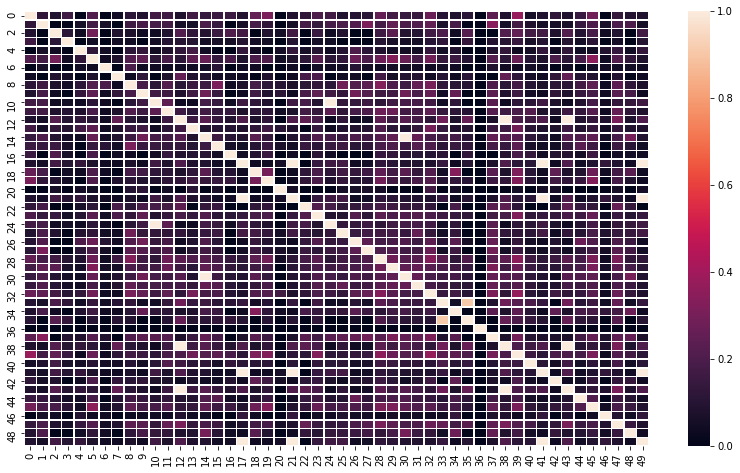

In [16]:

plt.figure(figsize=(14,8))
# uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(dj, linewidth=0.5)
plt.show()

# `What did we miss?`

+ It appears that we have some tweets that are repeating!

+ due to this we end up with cosine similarity of 1, for 7 of the entries. 
    + Since, this is the case we could do a few things in the future: 
        + look for duplicates
        + check to see if these are valid entries
        + understand what is going on with our data
        + discard depending on the circumstance.
        
I went back and looked at the entries:

They appear to be retweets, which means that multiple people may have the same tweet for any given time. Since, these tweets were based on a specific criteria/genre this makes sense. 


In [17]:
# unique number of tweets: out of 50
len(set(parse_tweets))

43

**`Next, we have 1 tweet that has zero cosine similarity: I went back `**

This may be: a junk/troll tweet. Possibly, pure nonsense or someone not sure how to use twitter. I don't know and that's my opinion.

In [18]:
parse_tweets[36]

'@lucaberta @elonmusk @jeffskoll @BillGates @gatesfoundation @WWF @GretaThunberg @reason @verve @mackenziebezos… '

# <font color=red>Like</font>,Share &

# <font color=red>SUB</font>scribe

**`Help Support the channel: Buy Me A Coffee @mrfugudatasci`**

# `Citations & Help:`

# ◔̯◔

https://t4tutorials.com/cosine-similarity-in-data-mining/

https://www.machinelearningplus.com/nlp/cosine-similarity/ (good example)

https://www.sciencedirect.com/topics/computer-science/cosine-similarity

https://sites.temple.edu/tudsc/2017/03/30/measuring-similarity-between-texts-in-python/

https://shravan-kuchkula.github.io/document_similarity/#code (also, good example!)